In [1]:
% matplotlib inline

from hippounit.utils import ModelLoader
from hippounit import tests

from json2html import *
import pkg_resources
import json
import collections
import numpy
import IPython

/usr/local/lib/python2.7/dist-packages/matplotlib/__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [2]:
# path to mod files
mod_files_path = "/home/saray/published_models/CA1_Gomez_2011/mechanism/"

#all the outputs will be saved here. It will be an argument to the test.
base_directory = '/mnt/csoport31-2/Modellezo_csapat/Sara/published_models_validation_results/'

#Load cell model
model = ModelLoader(mod_files_path = mod_files_path )

# outputs will be saved in subfolders named like this:
model.name="Gomez_Gonzalez_2011_n128_morph"

# path to hoc file
# the model must not display any GUI!!
model.hocpath = "/home/saray/published_models/CA1_Gomez_2011/experiment/junio/main_model_n128_morph.hoc"

# If the hoc file doesn't contain a template, this must be None (the default value is None)
model.template_name = None

# model.SomaSecList_name should be None, if there is no Section List in the model for the soma, or if the name of the soma section is given by setting model.soma (the default value is None)
model.SomaSecList_name = None
# if the soma is not in a section list or to use a specific somatic section, add its name here:
model.soma = 'soma[0]'

# For the PSP Attenuation Test, and Back-propagating AP Test a section list containing the trunk sections is needed
model.TrunkSecList_name = 'apical_trunk_list'
# For the Oblique Integration Test a section list containing the oblique dendritic sections is needed
model.ObliqueSecList_name = 'oblique_dendrites'


model.v_init = -66
model.celsius = 34


### Somatic Features Test - UCL data set

In [3]:
# Load target data
with open('/home/saray/target_features/feat_CA1_pyr_cACpyr_more_features.json') as f:
    config_pyr = json.load(f, object_pairs_hook=collections.OrderedDict)
    
observation = config_pyr

- running amplitude: -1.0 on model: Gomez_Gonzalez_2011_n128_morph at: soma[0](0.5)
- running amplitude: -0.8 on model: Gomez_Gonzalez_2011_n128_morph at: soma[0](0.5)
- running amplitude: -0.6 on model: Gomez_Gonzalez_2011_n128_morph at: soma[0](0.5)
- running amplitude: -0.4 on model: Gomez_Gonzalez_2011_n128_morph at: soma[0](0.5)
- running amplitude: -0.2 on model: Gomez_Gonzalez_2011_n128_morph at: soma[0](0.5)
- running amplitude: 0.6 on model: Gomez_Gonzalez_2011_n128_morph at: soma[0](0.5)
- running amplitude: 0.2 on model: Gomez_Gonzalez_2011_n128_morph at: soma[0](0.5)
- running amplitude: 0.4 on model: Gomez_Gonzalez_2011_n128_morph at: soma[0](0.5)
- running amplitude: 0.8 on model: Gomez_Gonzalez_2011_n128_morph at: soma[0](0.5)
- running amplitude: 1.0 on model: Gomez_Gonzalez_2011_n128_morph at: soma[0](0.5)
The figures are saved in the directory:  /mnt/csoport31-2/Modellezo_csapat/Sara/published_models_validation_results/figs/somaticfeat_UCL_data/Gomez_Gonzalez_2011_n12

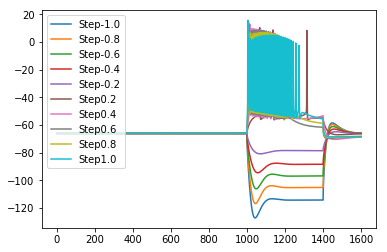

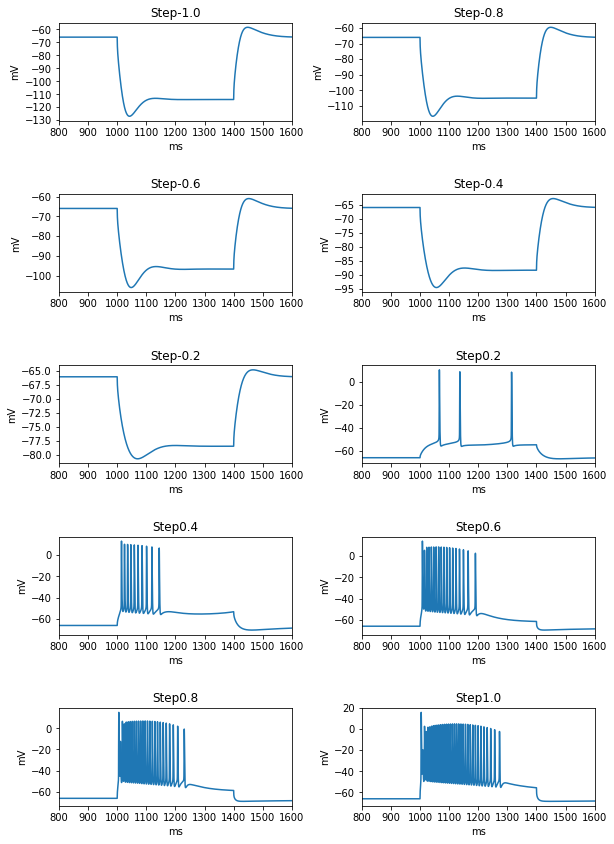

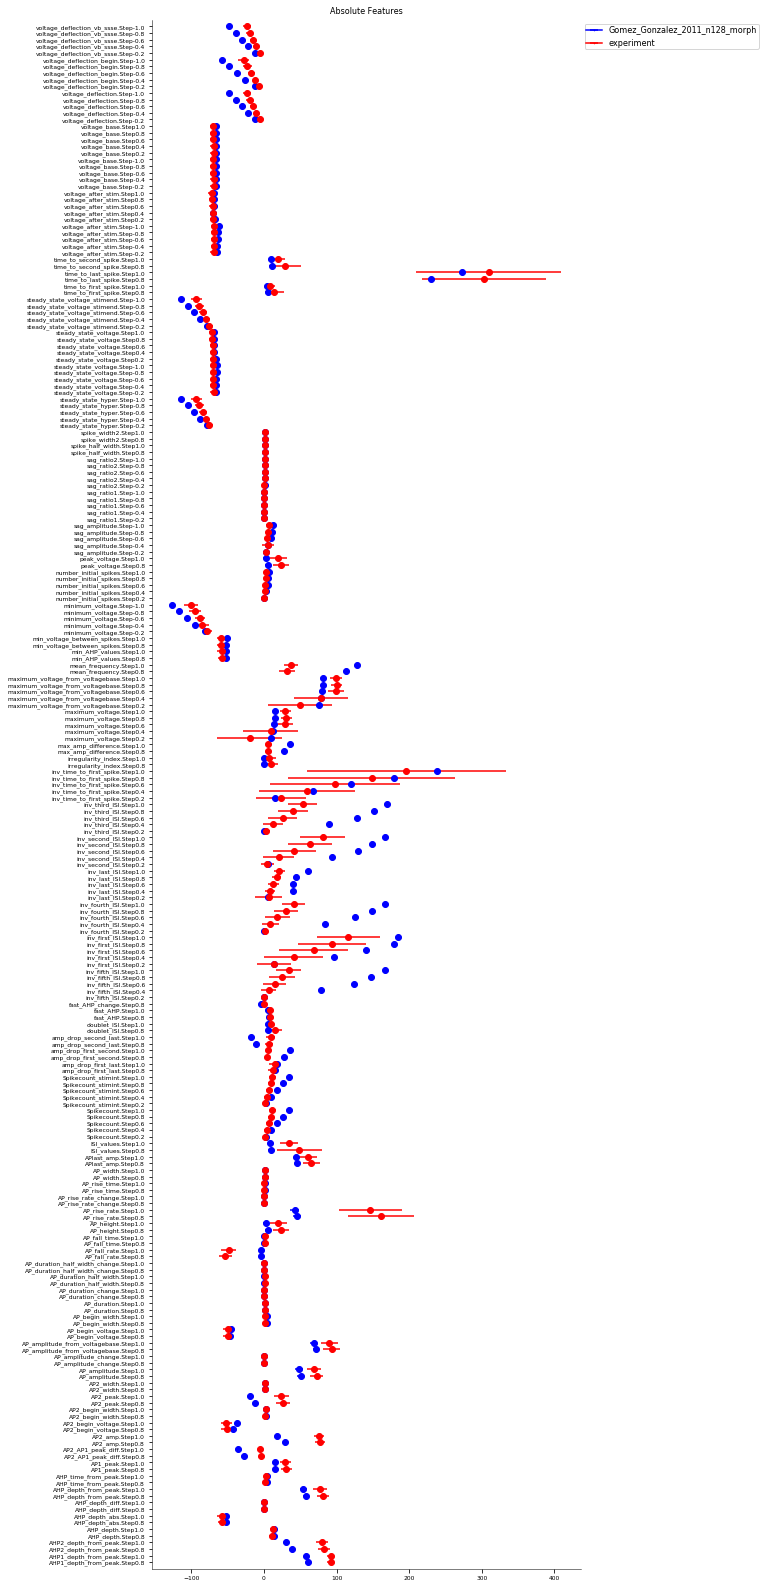

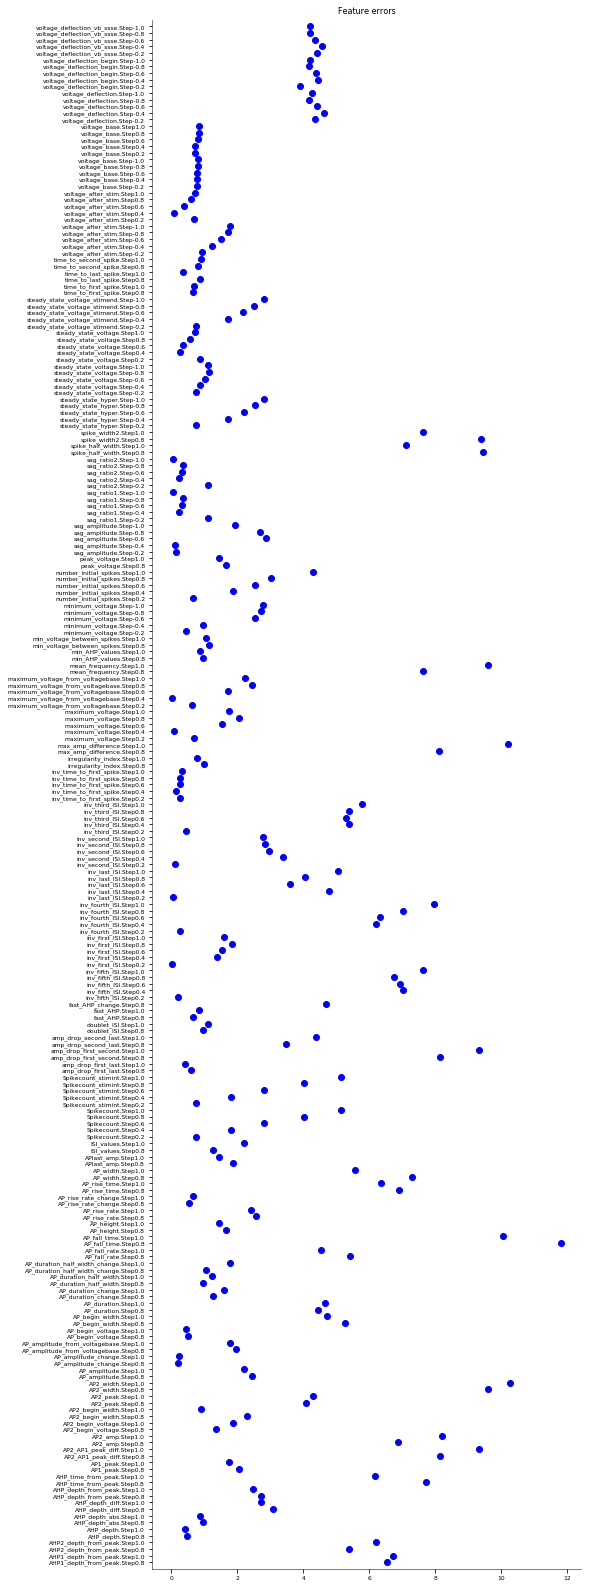

=== Model Gomez_Gonzalez_2011_n128_morph achieved score ZScore_avg = 2.81 on test 'Somatic features test'. ===


In [4]:
# Load stimuli file
ttype = "CA1_pyr_cACpyr"

stim_file = pkg_resources.resource_filename("hippounit", "tests/stimuli/somafeat_stim/stim_" + ttype + ".json")
with open(stim_file, 'r') as f:
    config = json.load(f, object_pairs_hook=collections.OrderedDict)
    
# Instantiate test class   
test = tests.SomaticFeaturesTest(observation=observation, config=config, force_run=False, show_plot=True, save_all = True, base_directory=base_directory)

# test.specify_data_set is added to the name of the subdirectory (somaticfeat), so test runs using different data sets can be saved into different directories
test.specify_data_set = 'UCL_data'

# Number of parallel processes
test.npool = 10
    
try:
    #Run the test 
    score = test.judge(model)
    #Summarize and print the score achieved by the model on the test using SciUnit's summarize function
    score.summarize()
except Exception as e:
    print 'Model: ' + model.name + ' could not be run'
    print e
    pass

### Somatic Features Test - JMakara data set

In [5]:
# Load target data
with open('/home/saray/target_features/feat_rat_CA1_JMakara_more_features.json') as f:
    config_pyr = json.load(f, object_pairs_hook=collections.OrderedDict)
    
observation = config_pyr

- running amplitude: -0.25 on model: Gomez_Gonzalez_2011_n128_morph at: soma[0](0.5)
- running amplitude: -0.2 on model: Gomez_Gonzalez_2011_n128_morph at: soma[0](0.5)
- running amplitude: -0.1 on model: Gomez_Gonzalez_2011_n128_morph at: soma[0](0.5)
- running amplitude: -0.15 on model: Gomez_Gonzalez_2011_n128_morph at: soma[0](0.5)
- running amplitude: 0.05 on model: Gomez_Gonzalez_2011_n128_morph at: soma[0](0.5)
- running amplitude: 0.1 on model: Gomez_Gonzalez_2011_n128_morph at: soma[0](0.5)
- running amplitude: -0.05 on model: Gomez_Gonzalez_2011_n128_morph at: soma[0](0.5)
- running amplitude: 0.15 on model: Gomez_Gonzalez_2011_n128_morph at: soma[0](0.5)
- running amplitude: 0.2 on model: Gomez_Gonzalez_2011_n128_morph at: soma[0](0.5)
- running amplitude: 0.25 on model: Gomez_Gonzalez_2011_n128_morph at: soma[0](0.5)


/home/saray/.local/lib/python2.7/site-packages/efel/api.py:479: RuntimeWarning: Error while calculating feature AHP_depth: 
Voltage never goes below or above threshold in spike detection.

 At least one spike required for calculation of min_AHP_indices.

Feature [min_AHP_values] is missing

  RuntimeWarning)
/home/saray/.local/lib/python2.7/site-packages/efel/api.py:479: RuntimeWarning: Error while calculating feature AHP_depth_abs: 
Voltage never goes below or above threshold in spike detection.

 At least one spike required for calculation of min_AHP_indices.

Feature [min_AHP_values] is missing

  RuntimeWarning)
/home/saray/.local/lib/python2.7/site-packages/efel/api.py:479: RuntimeWarning: Error while calculating feature AHP_depth_diff: 
Voltage never goes below or above threshold in spike detection.

 At least one spike required for calculation of min_AHP_indices.

Feature [min_AHP_values] is missing

Feature [AHP_depth] is missing

  RuntimeWarning)
/home/saray/.local/lib/python

/usr/local/lib/python2.7/dist-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/saray/.local/lib/python2.7/site-packages/efel/api.py:479: RuntimeWarning: Error while calculating feature AP_rise_time: 
Voltage never goes below or above threshold in spike detection.

 At least one spike required for calculation of min_AHP_indices.

Feature [min_AHP_indices] is missing

Feature [AP_begin_indices] is missing

  RuntimeWarning)
/home/saray/.local/lib/python2.7/site-packages/efel/api.py:479: RuntimeWarning: Error while calculating feature AP_width: 
Voltage never goes below or above threshold in spike detection.

 At least one spike required for calculation of min_AHP_indices.

No spike in trace.

  RuntimeWarning)
/home/saray/.local/lib/python2.7/site-packages/efel/api.py:479: RuntimeWarning: Error while calculating feature ISI_CV: 
 Three spikes required for calculation of ISI_values.

Feature [ISI_va

/home/saray/.local/lib/python2.7/site-packages/efel/api.py:479: RuntimeWarning: Error while calculating feature time_to_first_spike: 
Voltage never goes below or above threshold in spike detection.

 One spike required for time_to_first_spike.

  RuntimeWarning)
/home/saray/.local/lib/python2.7/site-packages/efel/api.py:479: RuntimeWarning: Error while calculating feature time_to_second_spike: 
Voltage never goes below or above threshold in spike detection.

 Two spikes required for time_to_second_spike.

  RuntimeWarning)


The figures are saved in the directory:  /mnt/csoport31-2/Modellezo_csapat/Sara/published_models_validation_results/figs/somaticfeat_JMakara_data/Gomez_Gonzalez_2011_n128_morph/
Features excluded (due to invalid values): AHP1_depth_from_peak.Step0.15, AHP2_depth_from_peak.Step0.15, AHP_depth.Step0.15, AHP_depth_abs.Step0.15, AHP_depth_diff.Step0.15, AHP_depth_from_peak.Step0.15, AHP_time_from_peak.Step0.15, AP1_peak.Step0.15, AP2_AP1_peak_diff.Step0.15, AP2_amp.Step0.15, AP2_begin_voltage.Step0.15, AP2_begin_width.Step0.15, AP2_peak.Step0.15, AP2_width.Step0.15, AP_amplitude.Step0.15, AP_amplitude_change.Step0.15, AP_amplitude_from_voltagebase.Step0.15, AP_begin_voltage.Step0.15, AP_begin_width.Step0.15, AP_duration.Step0.15, AP_duration_change.Step0.15, AP_duration_change.Step0.2, AP_duration_half_width.Step0.15, AP_duration_half_width_change.Step0.15, AP_duration_half_width_change.Step0.2, AP_fall_rate.Step0.15, AP_fall_time.Step0.15, AP_height.Step0.15, AP_rise_rate.Step0.15, AP_ris

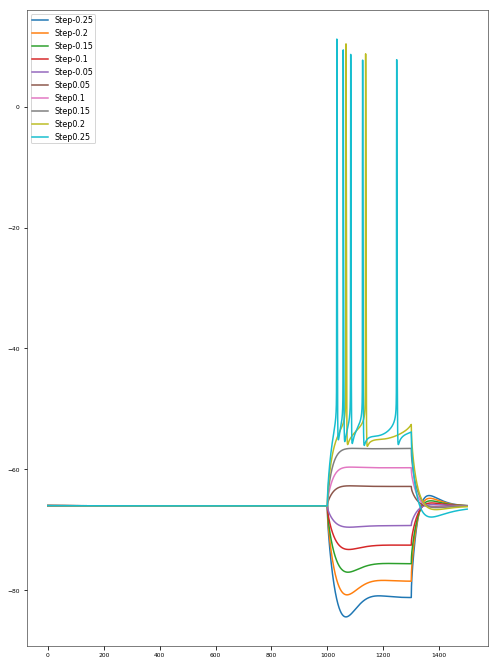

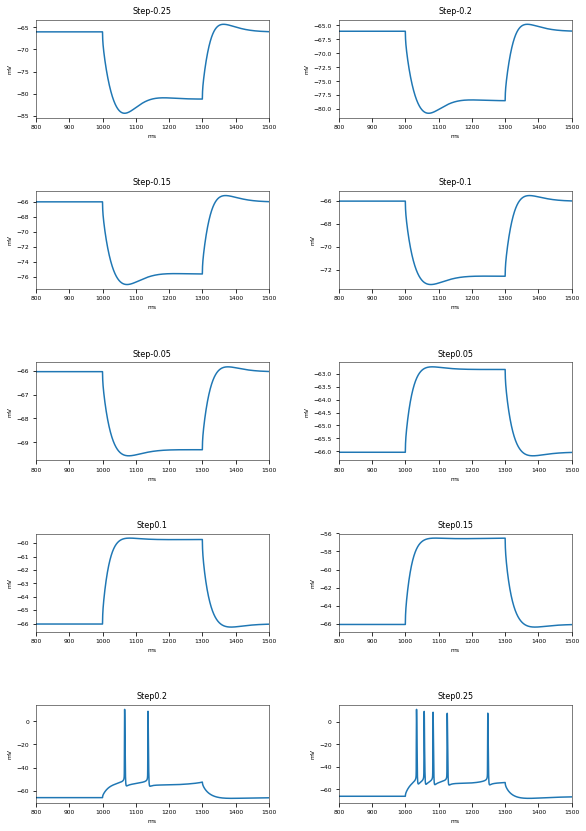

/usr/local/lib/python2.7/dist-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


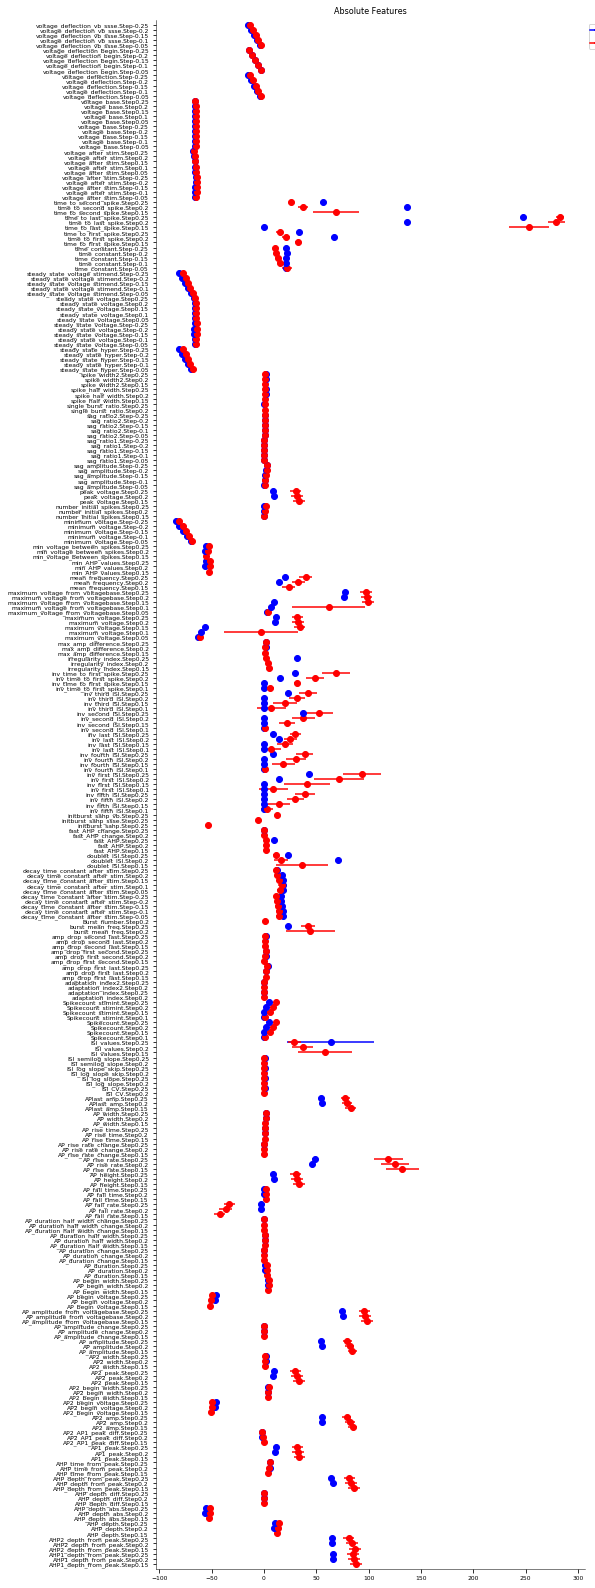

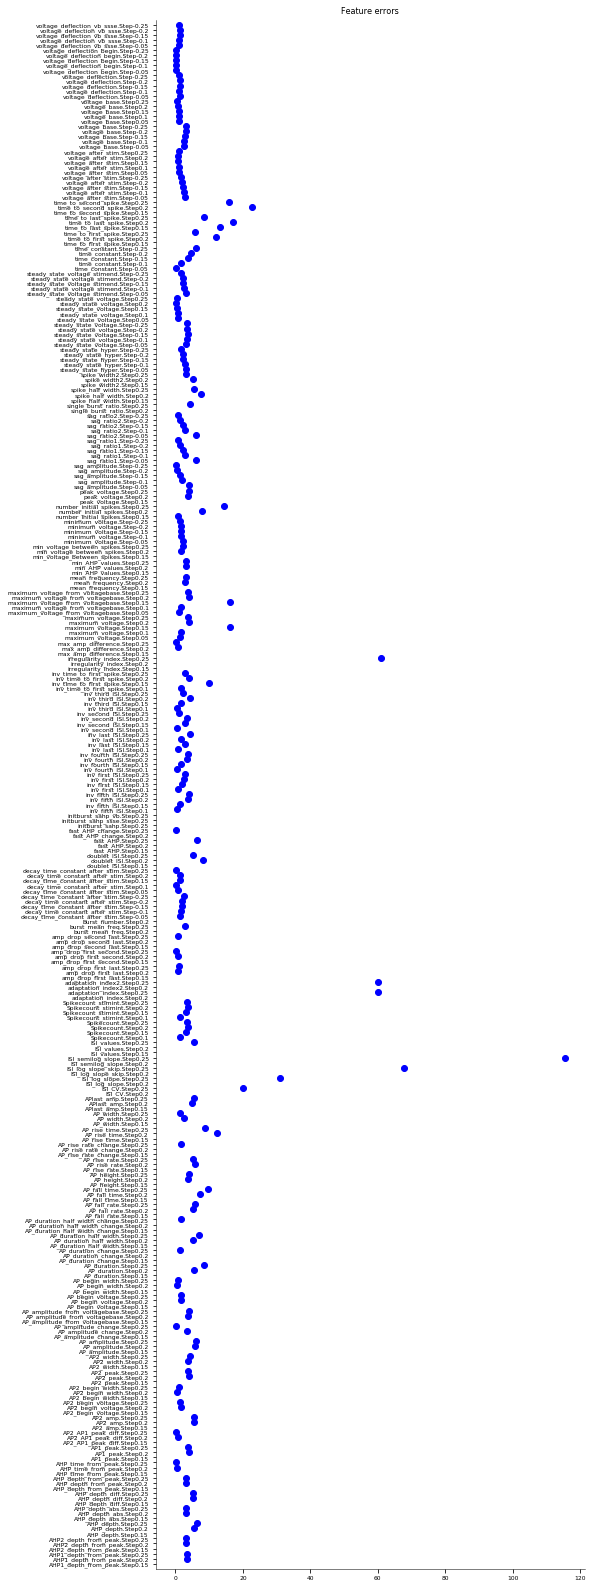

=== Model Gomez_Gonzalez_2011_n128_morph achieved score ZScore_avg = 4.87 on test 'Somatic features test'. ===


In [6]:
# Load stimuli file
stim_file = pkg_resources.resource_filename("hippounit", "tests/stimuli/somafeat_stim/stim_rat_CA1_PC_JMakara.json")
with open(stim_file, 'r') as f:
    config = json.load(f, object_pairs_hook=collections.OrderedDict)
    
# Instantiate test class   
test = tests.SomaticFeaturesTest(observation=observation, config=config, force_run=False, show_plot=True, save_all = True, base_directory=base_directory)

# test.specify_data_set is added to the name of the subdirectory (somaticfeat), so test runs using different data sets can be saved into different directories
test.specify_data_set = 'JMakara_data'

# Number of parallel processes
test.npool = 10

try:
    #Run the test 
    score = test.judge(model)
    #Summarize and print the score achieved by the model on the test using SciUnit's summarize function
    score.summarize()
except Exception as e:
    print 'Model: ' + model.name + ' could not be run'
    print e
    pass

### PSP Attenuatuion Test

In [7]:
# Load target data
with open("/home/saray/target_features/feat_PSP_attenuation_target_data.json", 'r') as f:
    observation = json.load(f, object_pairs_hook=collections.OrderedDict)

IPython.display.HTML(json2html.convert(json = observation))

mean_attenuation_soma/dend_100_um,0.67037891837
std_attenuation_soma/dend_100_um,0.0745536001493
mean_attenuation_soma/dend_200_um,0.485024302539
std_attenuation_soma/dend_200_um,0.108372269307
mean_attenuation_soma/dend_300_um,0.282118043034
std_attenuation_soma/dend_300_um,0.0482703550105


Dendritic locations to be tested (with their actual distances): {('trunk[3]', 0.5): 206.64658781170488, ('trunk[5]', 0.7): 265.8784569057232, ('trunk[5]', 0.1): 255.7597530811978, ('trunk[2]', 0.1): 147.0310408362326, ('trunk[4]', 0.7): 246.46633172670397, ('trunk[4]', 0.1): 231.252390292558, ('trunk[2]', 0.7): 172.06130843643933, ('trunk[7]', 0.7): 323.5615623584028, ('trunk[1]', 0.5): 127.54951947275707, ('trunk[4]', 0.8999999999999999): 251.53764553808594, ('trunk[7]', 0.5): 309.9748021722534, ('trunk[0]', 0.8999999999999999): 107.18338675606768, ('trunk[3]', 0.1): 188.99047135157517, ('trunk[3]', 0.30000000000000004): 197.81852958164, ('trunk[1]', 0.7): 133.67344351146681}
input at: trunk[1](0.7) with weight: 0.0
input at: trunk[2](0.7) with weight: 0.0
input at: trunk[5](0.7) with weight: 0.0
input at: trunk[3](0.5) with weight: 0.0
input at: trunk[0](0.9) with weight: 0.0
input at: trunk[3](0.1) with weight: 0.0
input at: trunk[4](0.1) with weight: 0.0
input at: trunk[4](0.9) wit

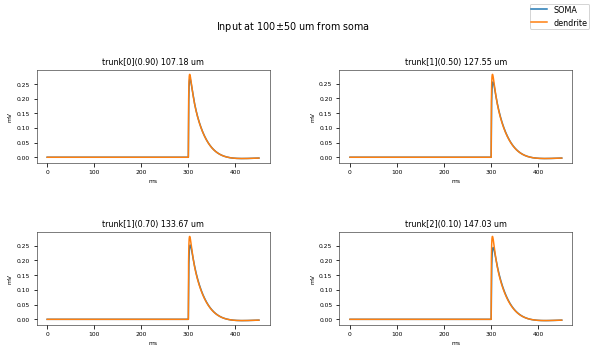

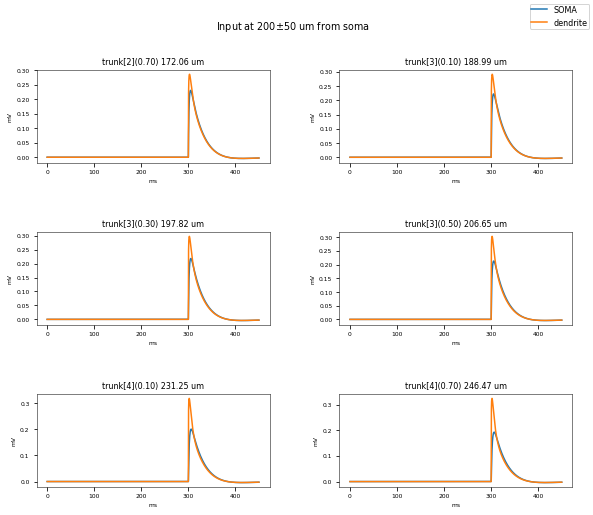

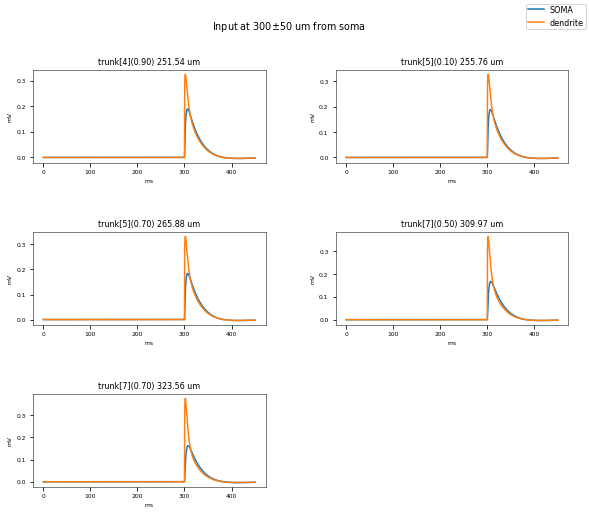

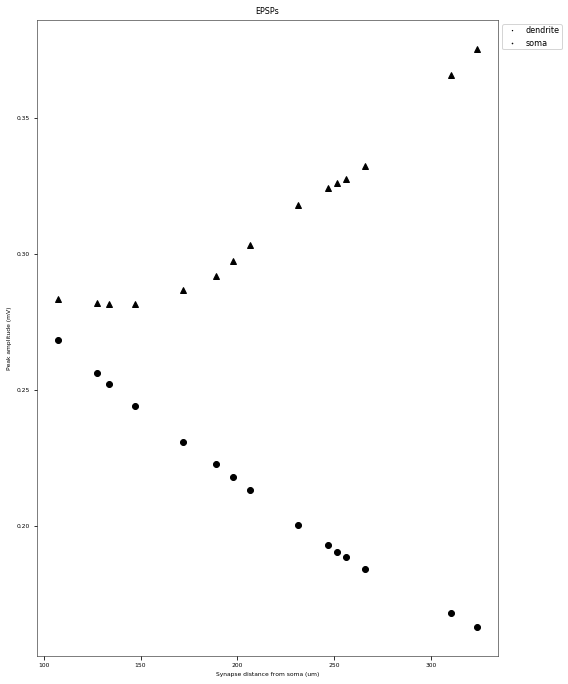

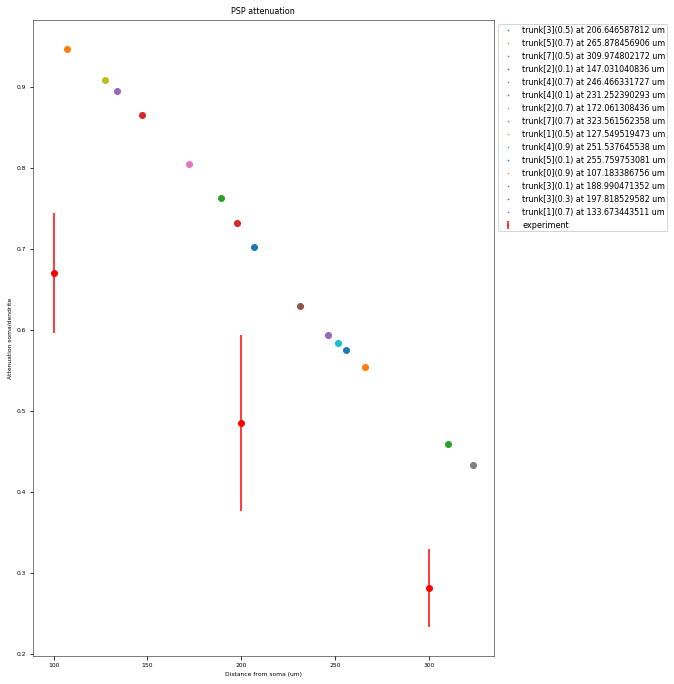

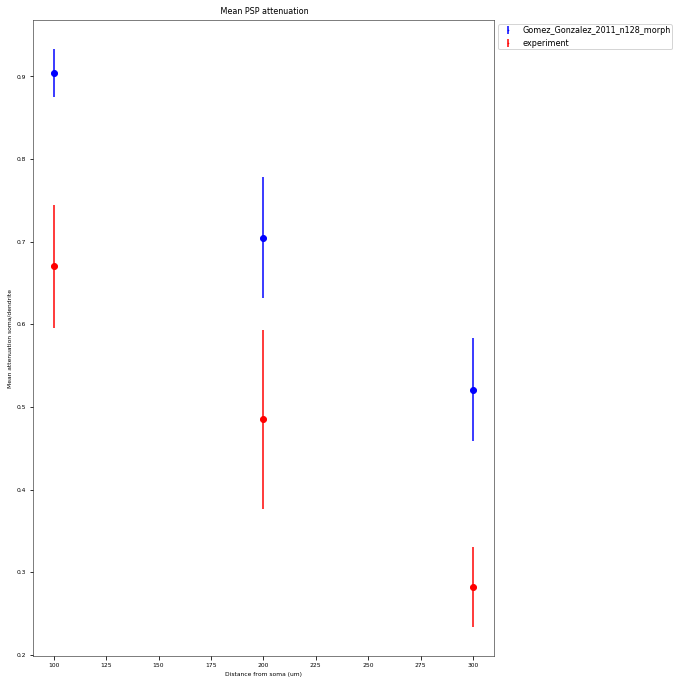

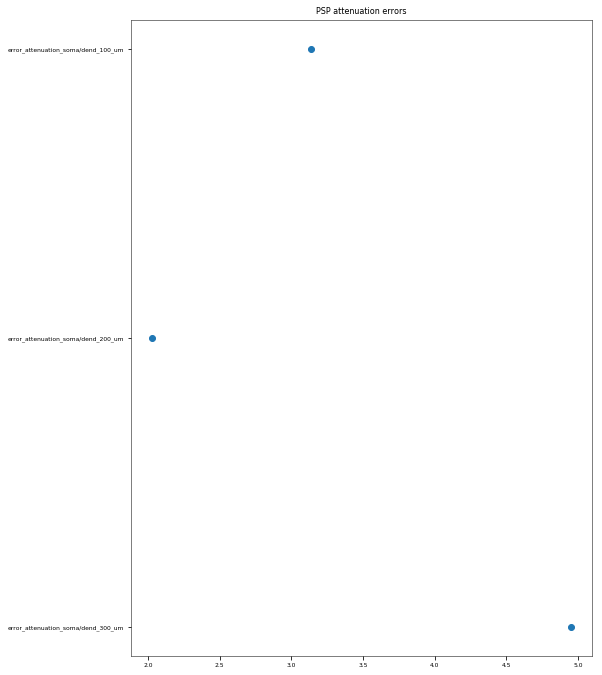

=== Model Gomez_Gonzalez_2011_n128_morph achieved score ZScore_avg = 3.37 on test 'PSP attenuation test'. ===


In [8]:
# Load stimuli file
stim_file = pkg_resources.resource_filename("hippounit", "tests/stimuli/PSP_attenuation_stim/stim_PSP_attenuation_test.json")

with open(stim_file, 'r') as f:
    config = json.load(f, object_pairs_hook=collections.OrderedDict)

# Instantiate test class 
test = tests.PSPAttenuationTest(config=config, observation=observation, num_of_dend_locations = 15, force_run=False, show_plot=True, save_all = True, base_directory=base_directory)
            
# Number of parallel processes
test.npool = 10

try: 
    # Run the test 
    score = test.judge(model)
    #Summarize and print the score achieved by the model on the test using SciUnit's summarize function
    score.summarize()
except Exception as e:
    print 'Model: ' + model.name + ' could not be run'
    print e
    pass 

### Back-Propagating AP Test

In [9]:
# Load target data
with open('/home/saray/target_features/feat_backpropagating_AP_target_data.json') as f:
    observation = json.load(f, object_pairs_hook=collections.OrderedDict)

#observation = config['features']
IPython.display.HTML(json2html.convert(json = observation))

mean_AP1_amp_at_50um,66.6474010216 mV
std_AP1_amp_at_50um,7.6800611053 mV
mean_AP1_amp_at_150um,61.6405452338 mV
std_AP1_amp_at_150um,8.84061901299 mV
mean_AP1_amp_at_250um,57.1478276286 mV
std_AP1_amp_at_250um,6.74288151869 mV
mean_AP1_amp_strong_propagating_at_350um,52.5065653152 mV
std_AP1_amp_strong_propagating_at_350um,5.82443856294 mV
mean_AP1_amp_weak_propagating_at_350um,18.7832282514 mV
std_AP1_amp_weak_propagating_at_350um,1.87203344953 mV
mean_APlast_amp_at_50um,56.0027067193 mV


Dendritic locations to be tested (with their actual distances): {('trunk[9]', 0.30000000000000004): 355.0952487281846, ('trunk[5]', 0.7): 265.8784569057232, ('trunk[8]', 0.30000000000000004): 346.08459228049816, ('trunk[5]', 0.5): 262.5055556308814, ('trunk[4]', 0.30000000000000004): 236.32370410393997, ('trunk[4]', 0.7): 246.46633172670397, ('trunk[10]', 0.5): 365.6826366363587, ('trunk[10]', 0.7): 366.17438322626305, ('trunk[8]', 0.7): 348.94177847099314, ('trunk[5]', 0.30000000000000004): 259.1326543560396, ('trunk[4]', 0.5): 241.395017915322, ('trunk[2]', 0.1): 147.0310408362326, ('trunk[2]', 0.30000000000000004): 155.37446336963484, ('trunk[5]', 0.8999999999999999): 269.25135818056503, ('trunk[8]', 0.1): 344.65599918525066, ('trunk[0]', 0.1): 66.73280579674733, ('trunk[10]', 0.1): 364.6991434565502, ('trunk[9]', 0.5): 357.7689691377313, ('trunk[4]', 0.1): 231.252390292558, ('trunk[4]', 0.8999999999999999): 251.53764553808594, ('trunk[11]', 0.1): 369.5205188366303, ('trunk[8]', 0.8

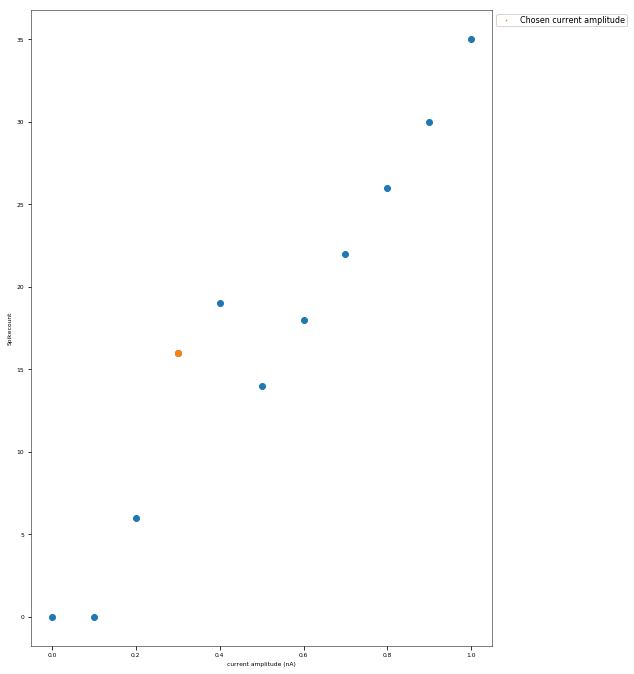

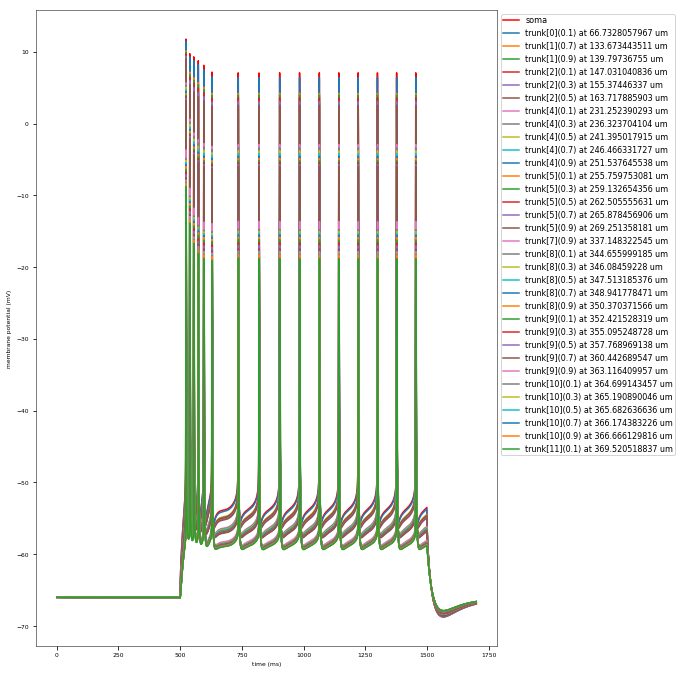

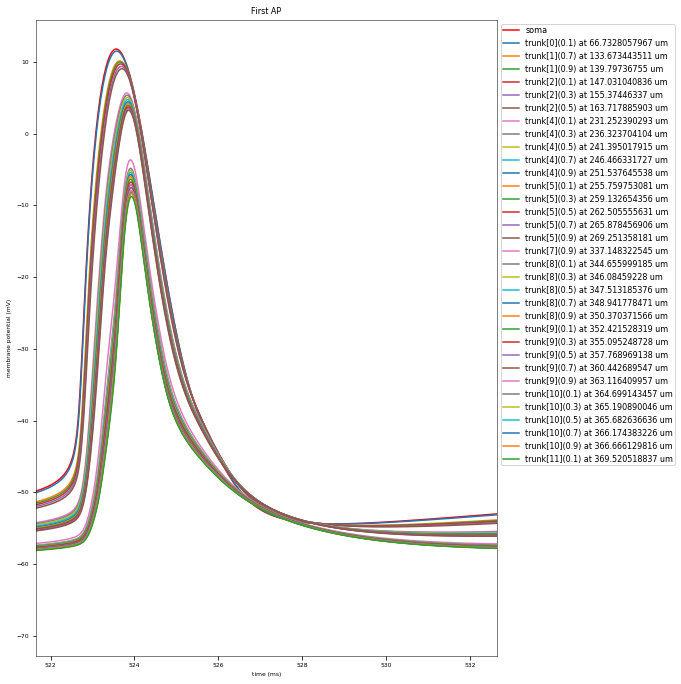

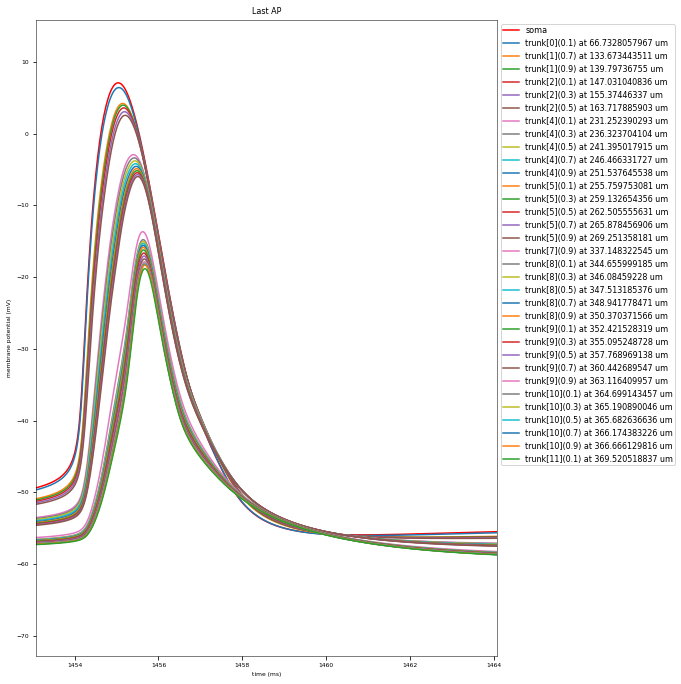

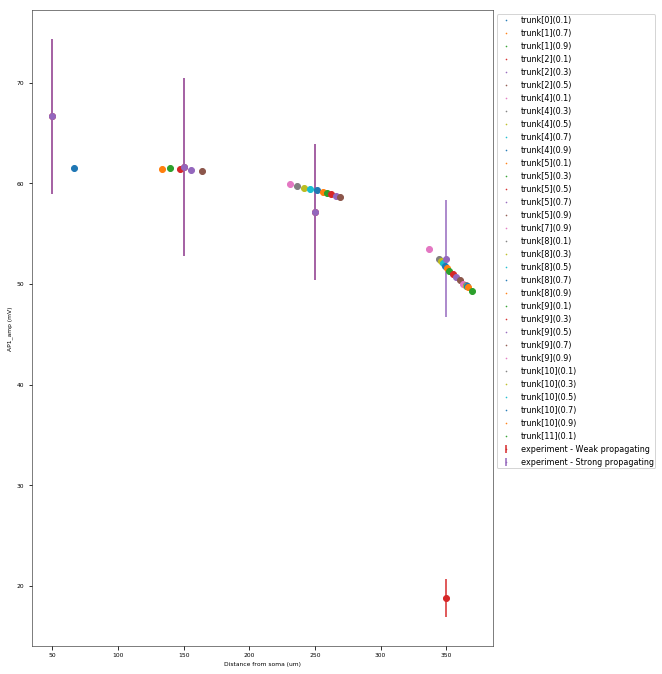

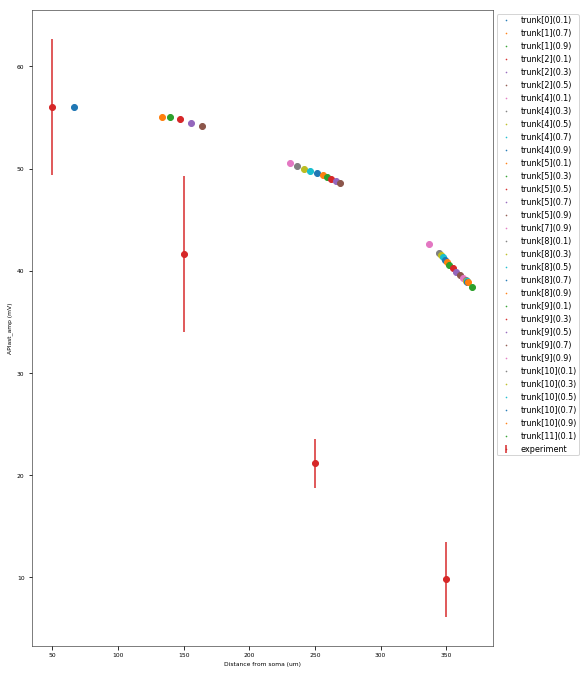

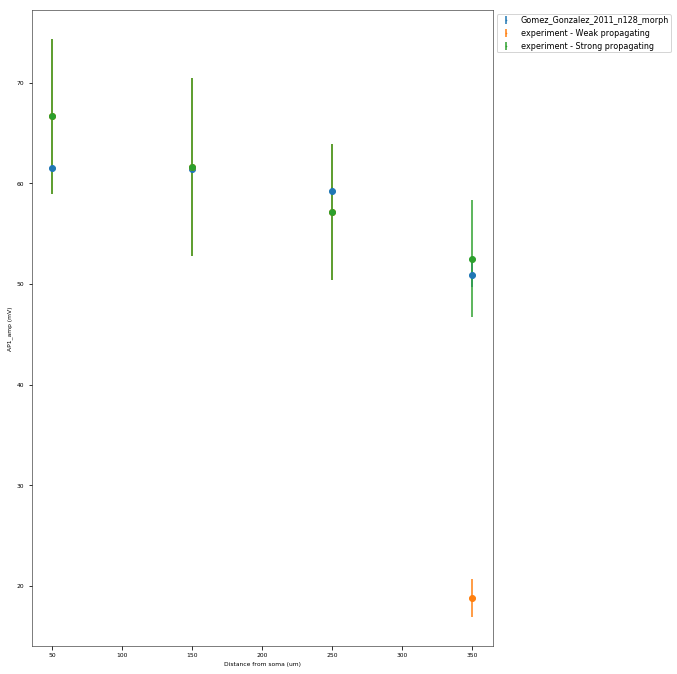

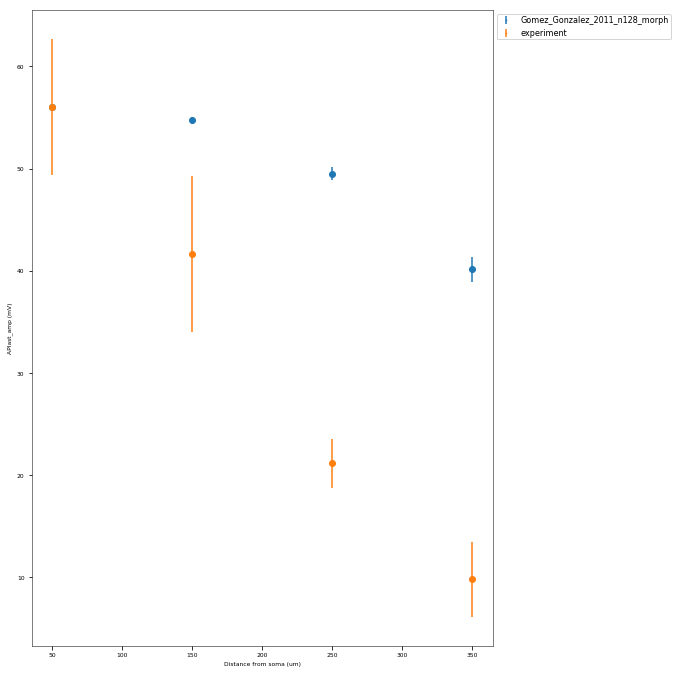

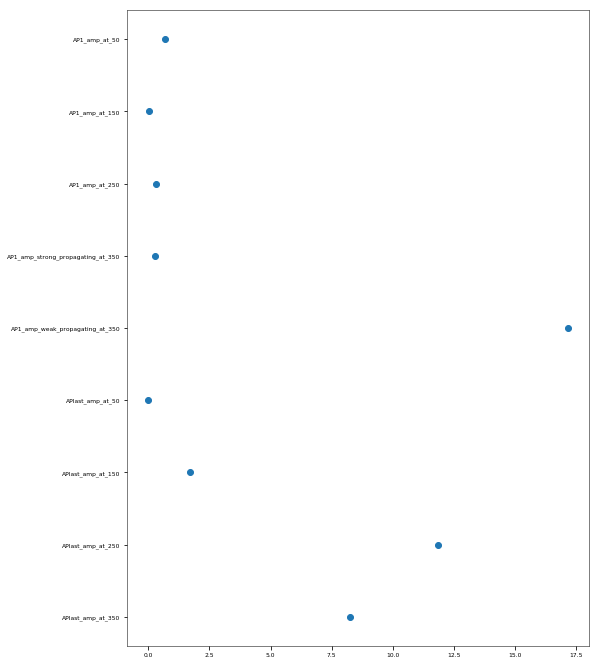

This is a rather STRONG propagating model
=== Model Gomez_Gonzalez_2011_n128_morph achieved score Z_score_avg_STRONG_propagating = 2.89 on test 'Back-propagating action potential test'. ===


In [10]:
# Load stimuli file
stim_file = pkg_resources.resource_filename("hippounit", "tests/stimuli/bAP_stim/stim_bAP_test.json")

with open(stim_file, 'r') as f:
    config = json.load(f, object_pairs_hook=collections.OrderedDict)

# Instantiate the test class
test = tests.BackpropagatingAPTest(config=config, observation=observation, force_run=False, force_run_FindCurrentStim=False, show_plot=True, save_all=True, base_directory=base_directory)

# Number of parallel processes
test.npool = 10

try: 
    # Run the test
    score = test.judge(model)
    #Summarize and print the score achieved by the model on the test using SciUnit's summarize function
    score.summarize()
except Exception as e:
    print 'Model: ' + model.name + ' could not be run'
    print e
    pass 

### Depolarization-block Test

In [11]:
# Load target data
with open('/home/saray/target_features/depol_block_target_data.json') as f:
    observation = json.load(f, object_pairs_hook=collections.OrderedDict)

#observation = config['features']
IPython.display.HTML(json2html.convert(json = observation))

mean_Ith,0.6 nA
Ith_std,0.3 nA
mean_Veq,-40.1 mV
Veq_std,3.4 mV


- running amplitude: 0.0 on model: Gomez_Gonzalez_2011_n128_morph at: soma[0](0.5)
- running amplitude: 0.05 on model: Gomez_Gonzalez_2011_n128_morph at: soma[0](0.5)
- running amplitude: 0.15000000000000002 on model: Gomez_Gonzalez_2011_n128_morph at: soma[0](0.5)
- running amplitude: 0.25 on model: Gomez_Gonzalez_2011_n128_morph at: soma[0](0.5)
- running amplitude: 0.30000000000000004 on model: Gomez_Gonzalez_2011_n128_morph at: soma[0](0.5)
- running amplitude: 0.2 on model: Gomez_Gonzalez_2011_n128_morph at: soma[0](0.5)
- running amplitude: 0.4 on model: Gomez_Gonzalez_2011_n128_morph at: soma[0](0.5)
- running amplitude: 0.45 on model: Gomez_Gonzalez_2011_n128_morph at: soma[0](0.5)
- running amplitude: 0.35000000000000003 on model: Gomez_Gonzalez_2011_n128_morph at: soma[0](0.5)
- running amplitude: 0.1 on model: Gomez_Gonzalez_2011_n128_morph at: soma[0](0.5)
- running amplitude: 0.5 on model: Gomez_Gonzalez_2011_n128_morph at: soma[0](0.5)
- running amplitude: 0.55 on model: 

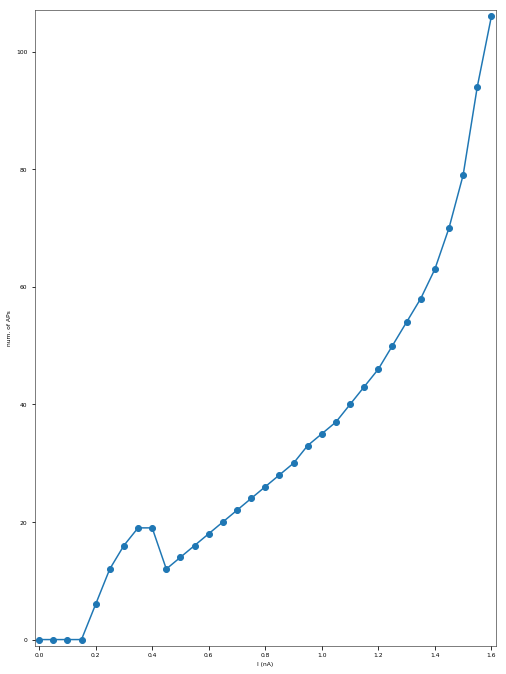

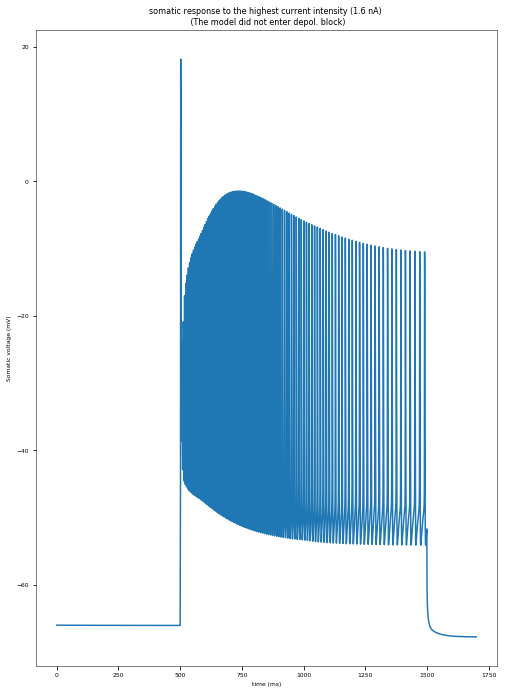

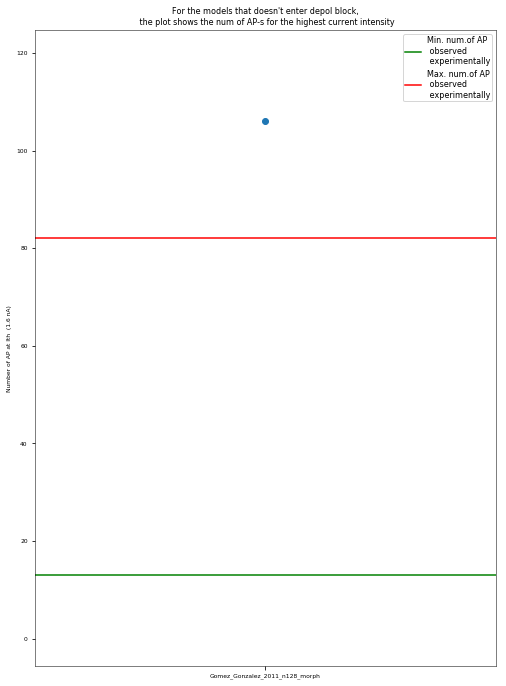

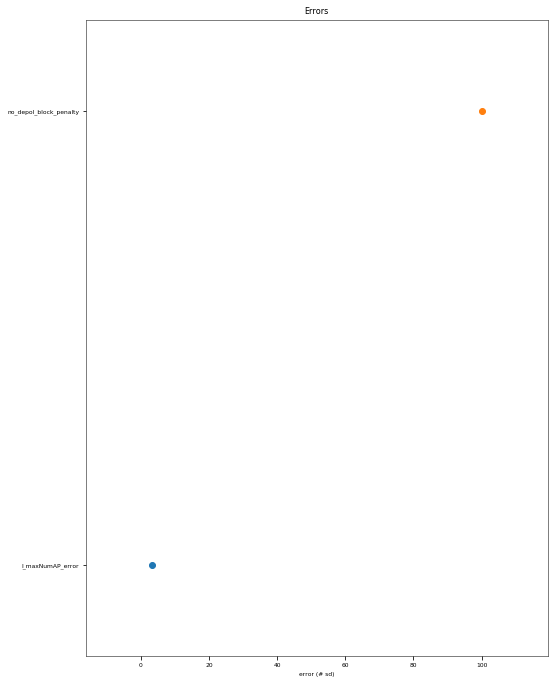

The model did not enter depolarization block.
=== Model Gomez_Gonzalez_2011_n128_morph achieved score ZScore_avg+penalty = 100.00 on test 'Depolarization block test'. ===


In [12]:
# Instantiate the test class

test = tests.DepolarizationBlockTest(observation=observation, force_run=False, show_plot=True, save_all=True, base_directory=base_directory)

# Number of parallel processes
test.npool = 10

try: 
    # Run the test
    score = test.judge(model)
    #Summarize and print the score achieved by the model on the test using SciUnit's summarize function
    score.summarize()
except Exception as e:
    print 'Model: ' + model.name + ' could not be run'
    print e
    pass 

### Oblique Integration Test

In [13]:
# Load target data
with open('/home/saray/target_features/oblique_target_data.json') as f:
    observation = json.load(f, object_pairs_hook=collections.OrderedDict)

IPython.display.HTML(json2html.convert(json = observation))

mean_threshold,3.4 mV
threshold_sem,0.2 mV
exp_n,92
mean_prox_threshold,4.5 mV
prox_threshold_sem,0.5 mV
prox_n,33
mean_dist_threshold,2.6 mV
dist_threshold_sem,0.2 mV
dist_n,44
mean_nonlin_at_th,142
nonlin_at_th_sem,9


Dendrites and locations to be tested:  [['apical_dendrite[115]', 0.1, 'prox'], ['apical_dendrite[115]', 0.30000000000000004, 'dist']]
Adjusting synaptic weights on all the locations ...
The dendritic spike at dendrite apical_dendrite[115](0.1) generated somatic AP - this location is not used in the test
- number of inputs: 0 dendrite: apical_dendrite[115] xloc: 0.3
- number of inputs: 1 dendrite: apical_dendrite[115] xloc: 0.3
- number of inputs: 2 dendrite: apical_dendrite[115] xloc: 0.3
- number of inputs: 3 dendrite: apical_dendrite[115] xloc: 0.3
- number of inputs: 4 dendrite: apical_dendrite[115] xloc: 0.3
- number of inputs: 5 dendrite: apical_dendrite[115] xloc: 0.3
- number of inputs: 6 dendrite: apical_dendrite[115] xloc: 0.3
- number of inputs: 7 dendrite: apical_dendrite[115] xloc: 0.3
- number of inputs: 8 dendrite: apical_dendrite[115] xloc: 0.3
- number of inputs: 9 dendrite: apical_dendrite[115] xloc: 0.3
- number of inputs: 10 dendrite: apical_dendrite[115] xloc: 0.3
-

/usr/local/lib/python2.7/dist-packages/numpy/core/fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python2.7/dist-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python2.7/dist-packages/numpy/core/_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/usr/local/lib/python2.7/dist-packages/numpy/core/_methods.py:110: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/usr/local/lib/python2.7/dist-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Results are saved in the directory:  /mnt/csoport31-2/Modellezo_csapat/Sara/published_models_validation_results/results/oblique_integration/Gomez_Gonzalez_2011_n128_morph/


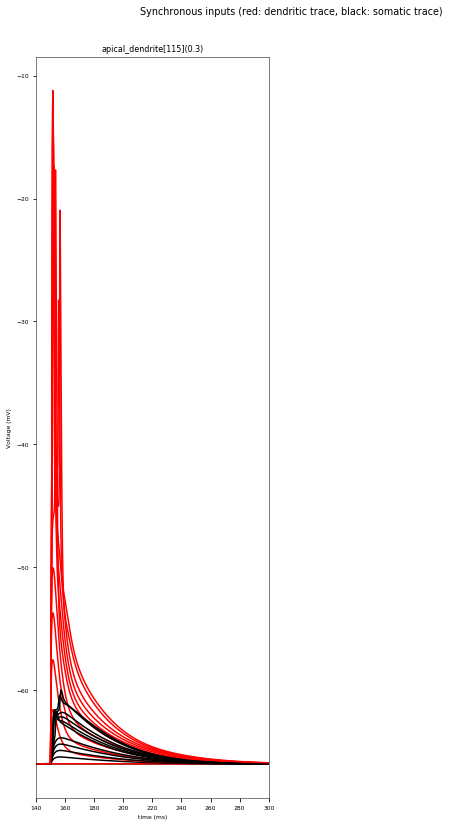

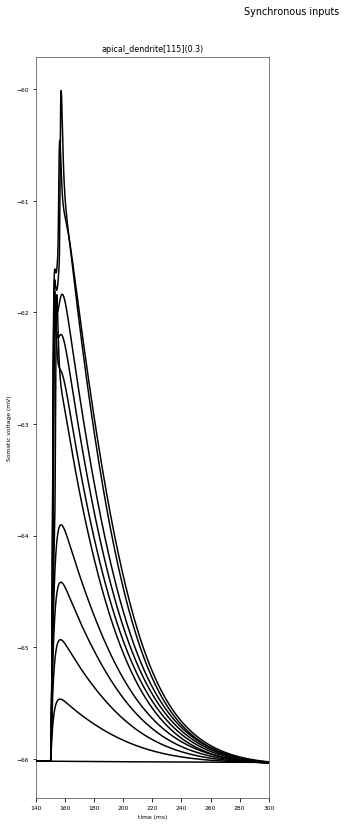

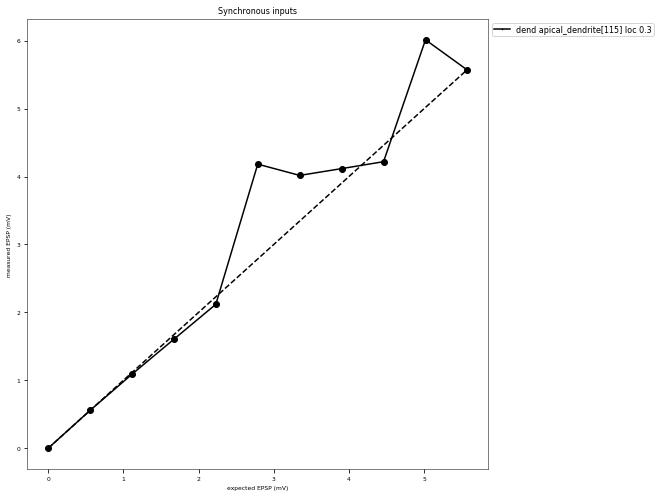

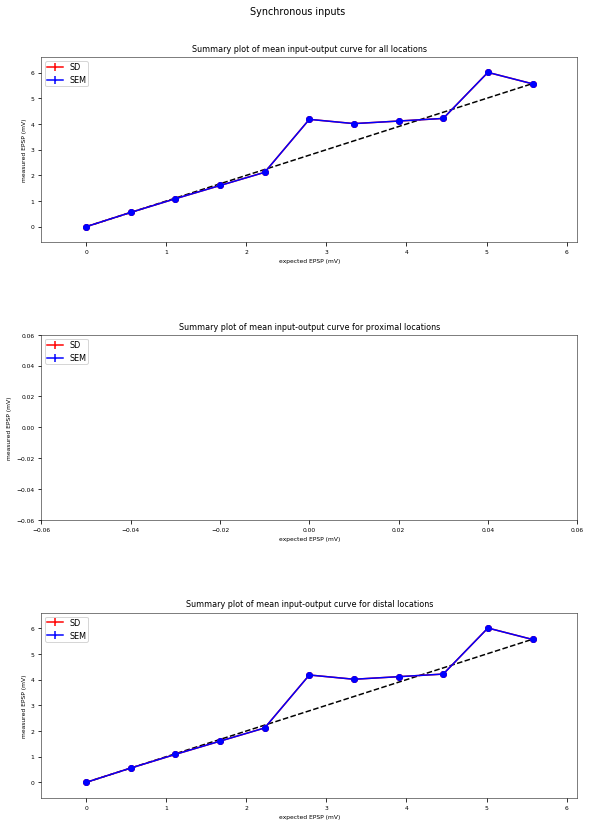

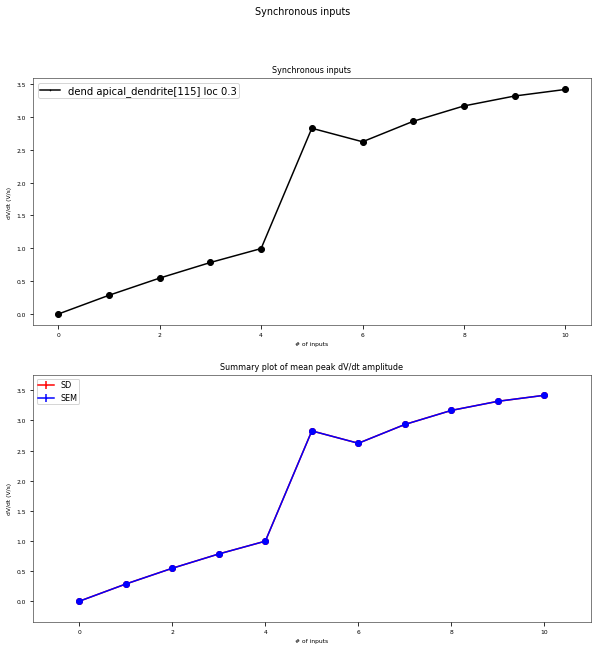

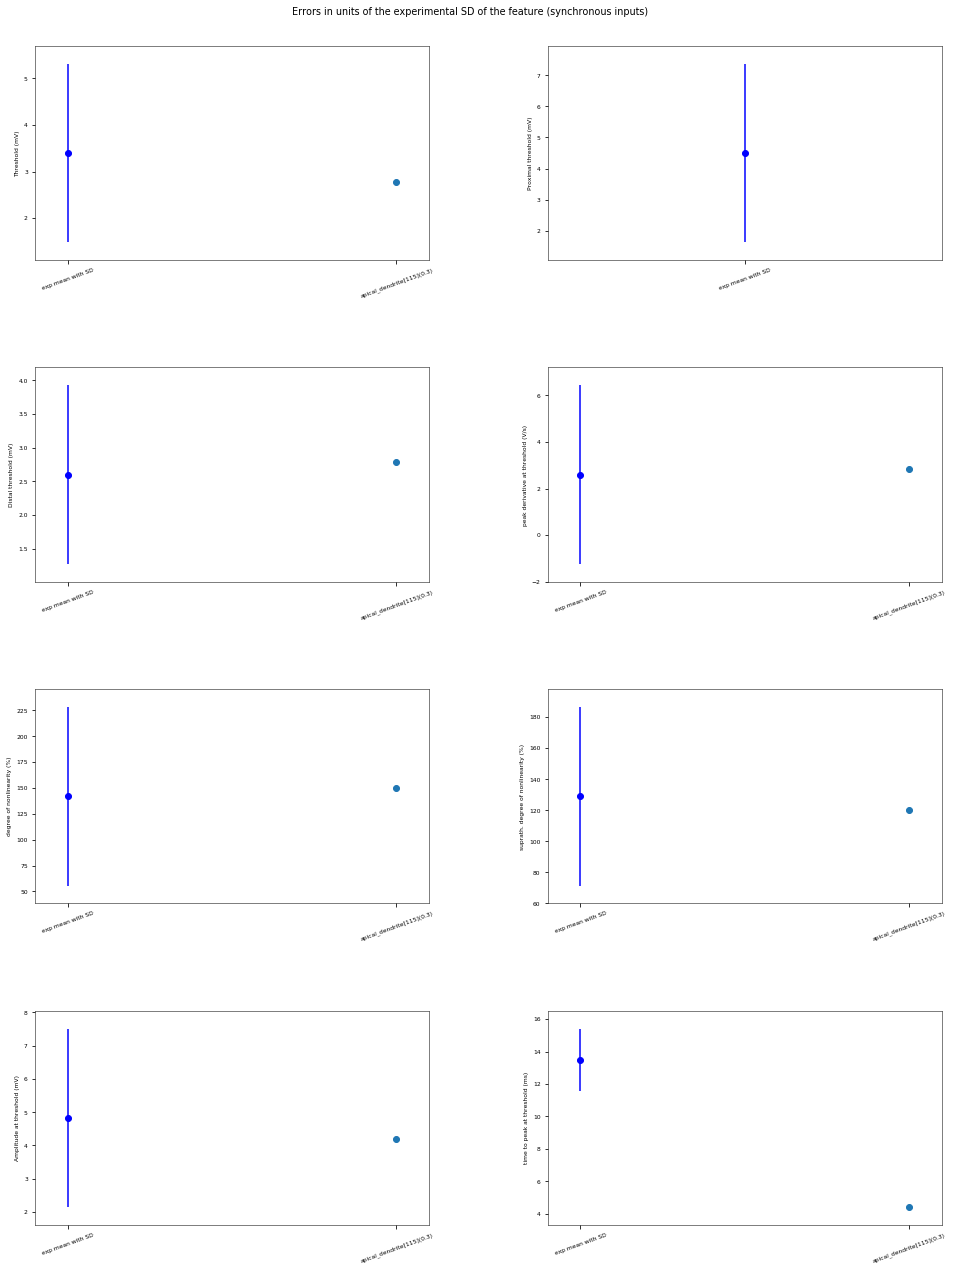

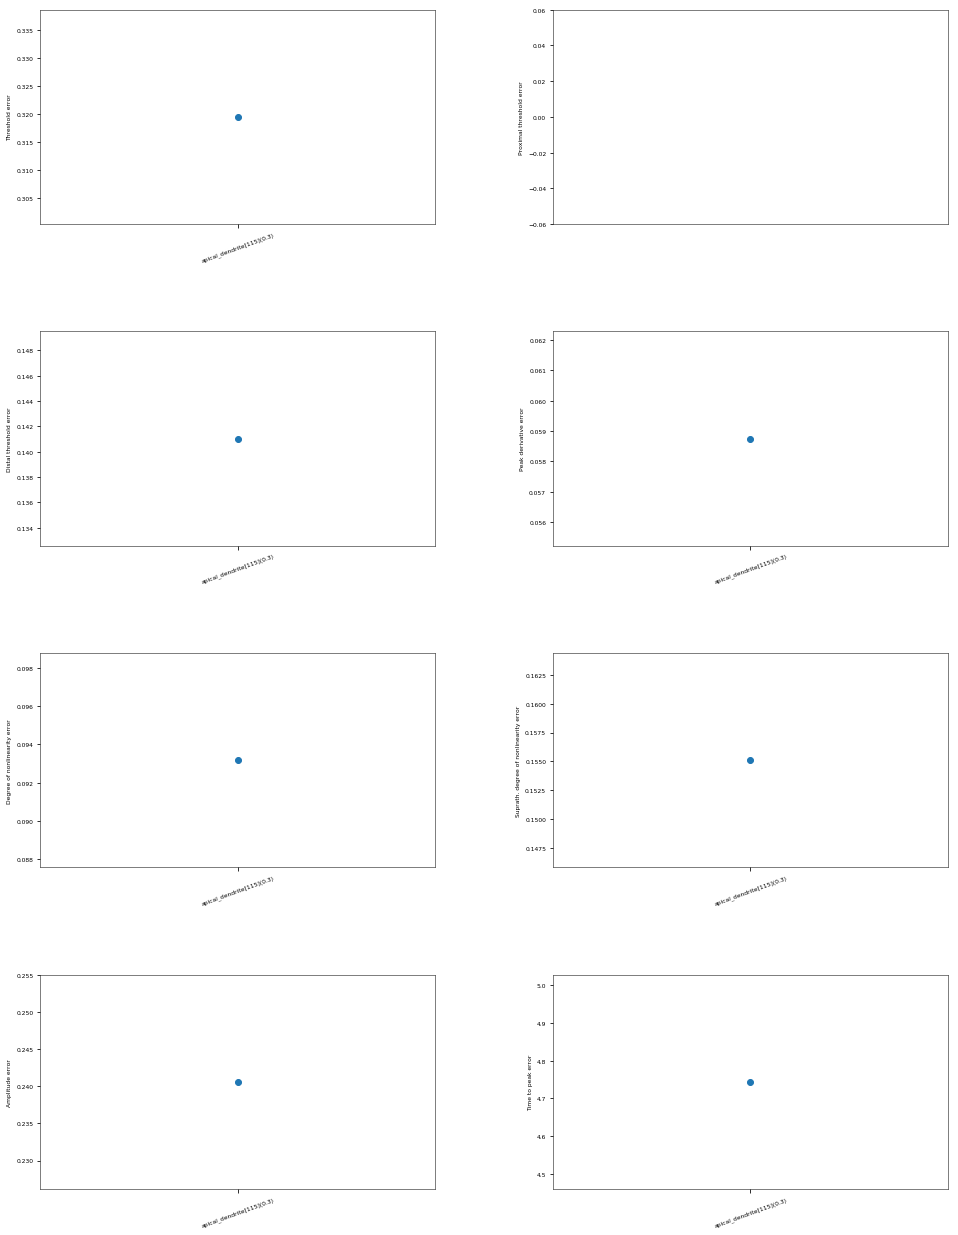

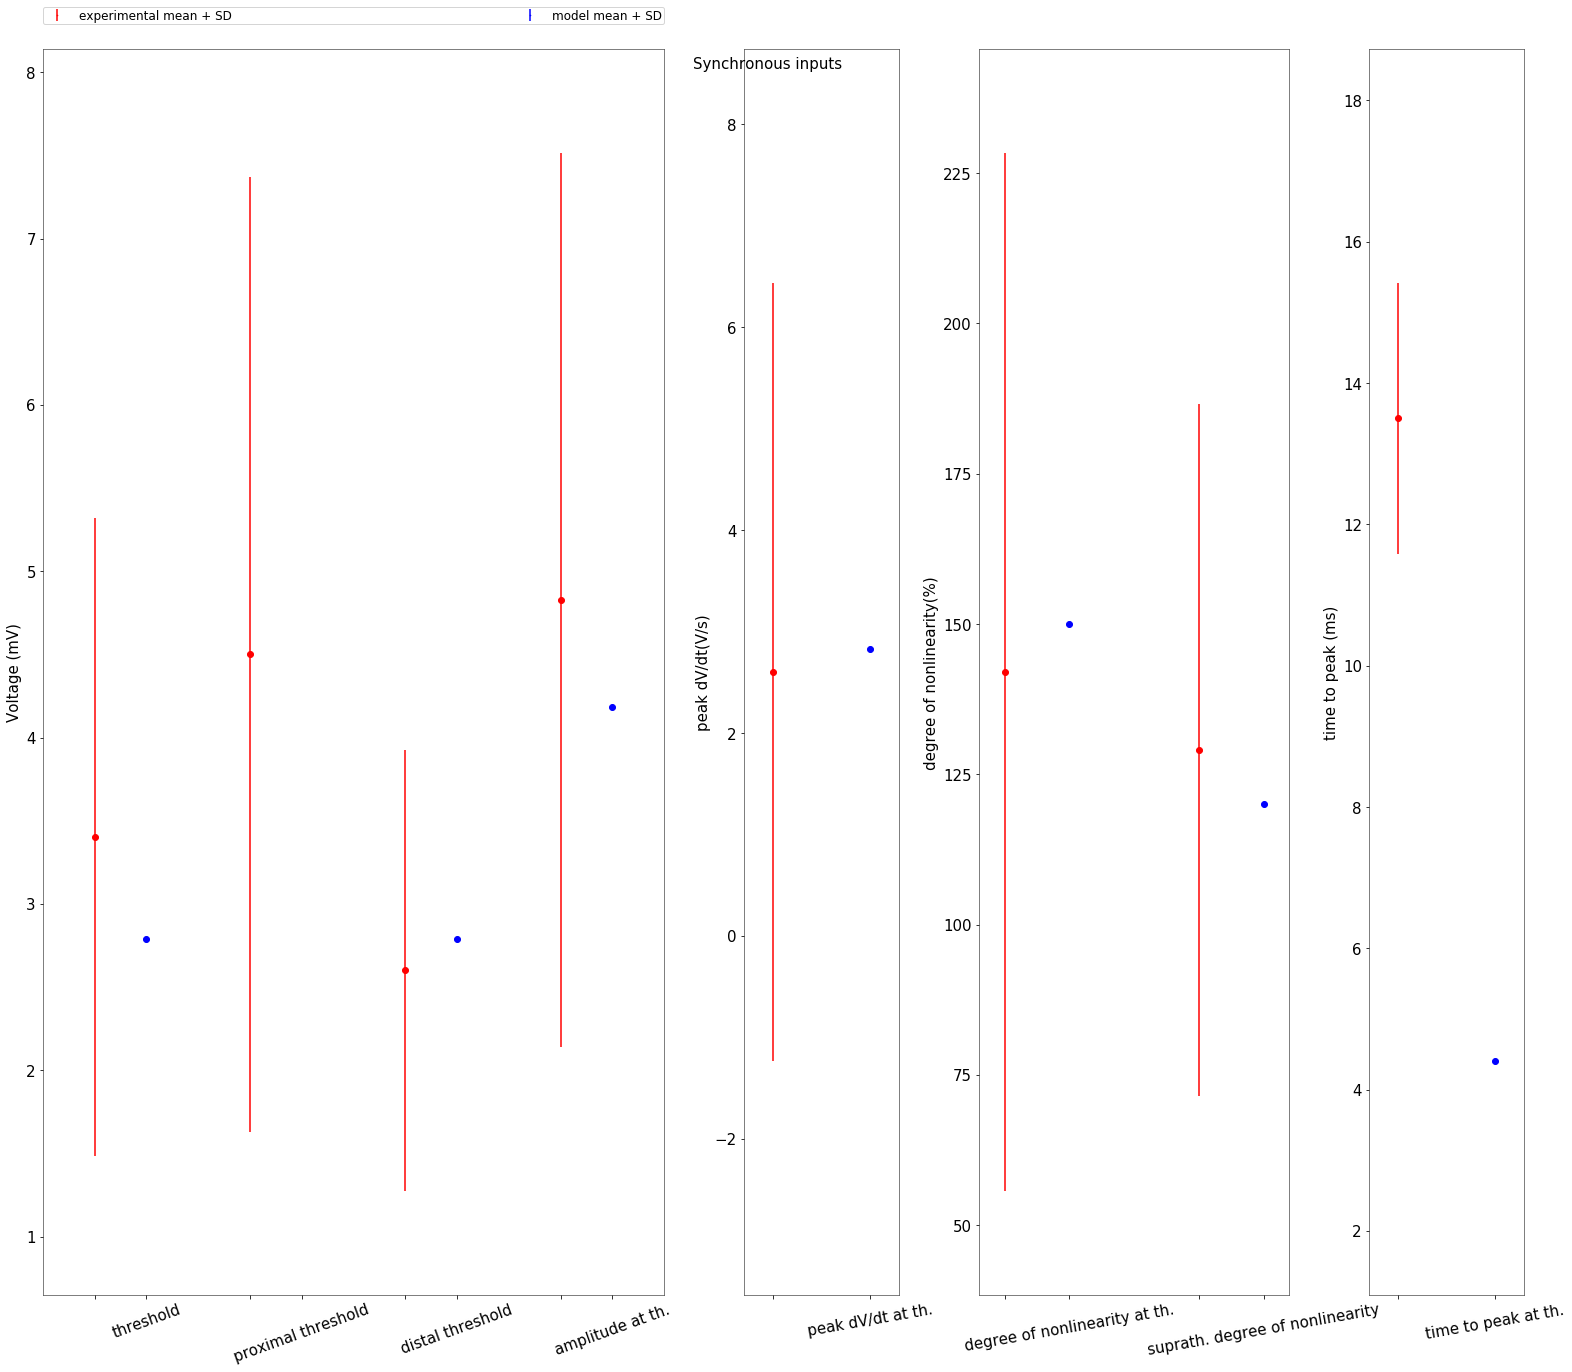

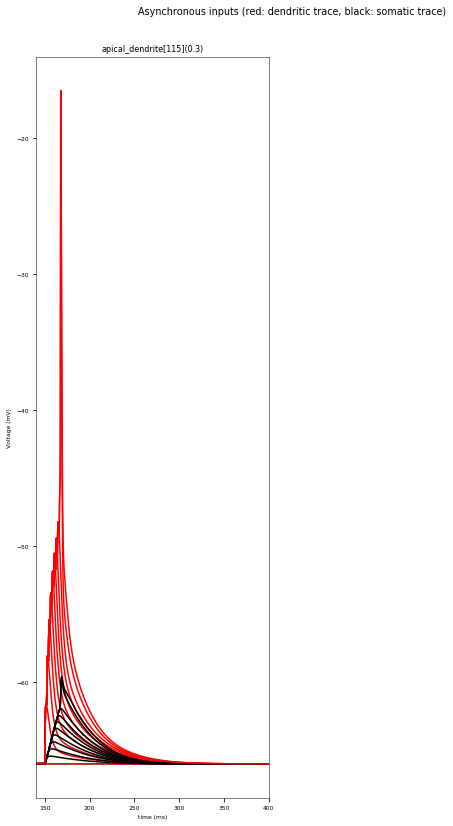

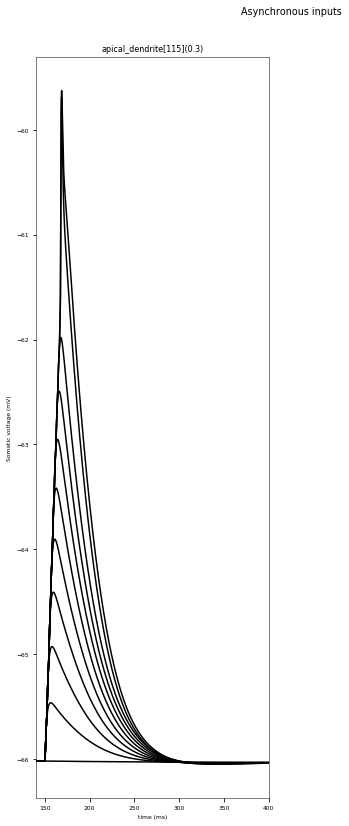

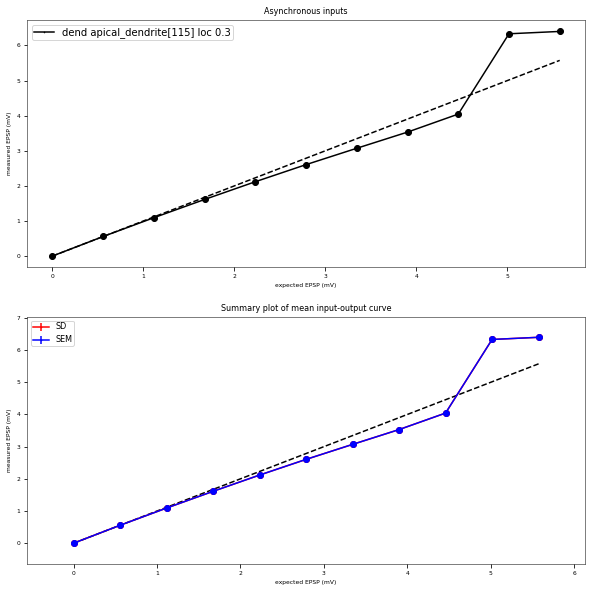

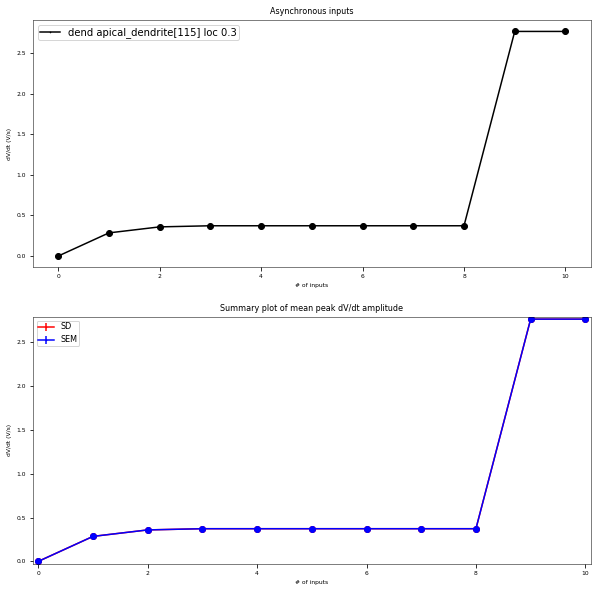

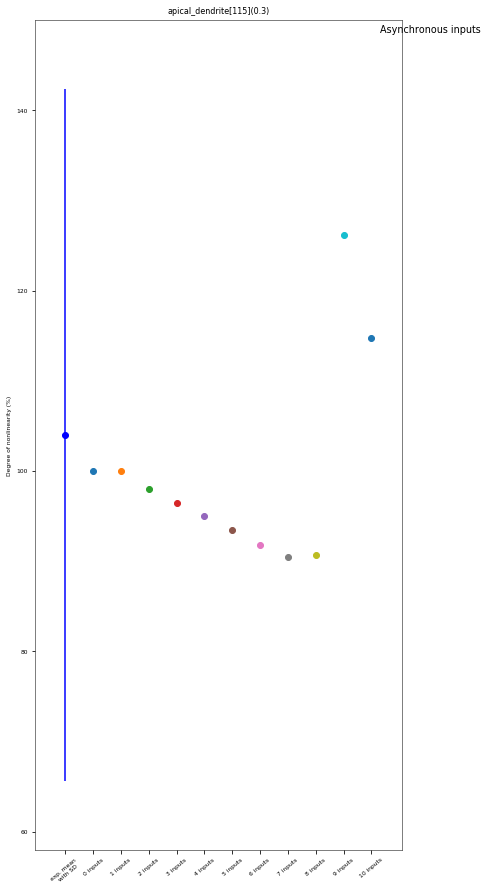

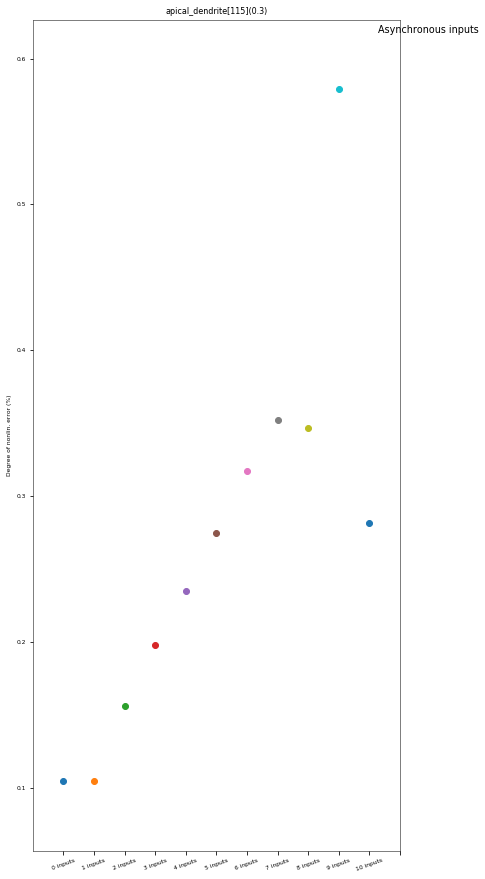

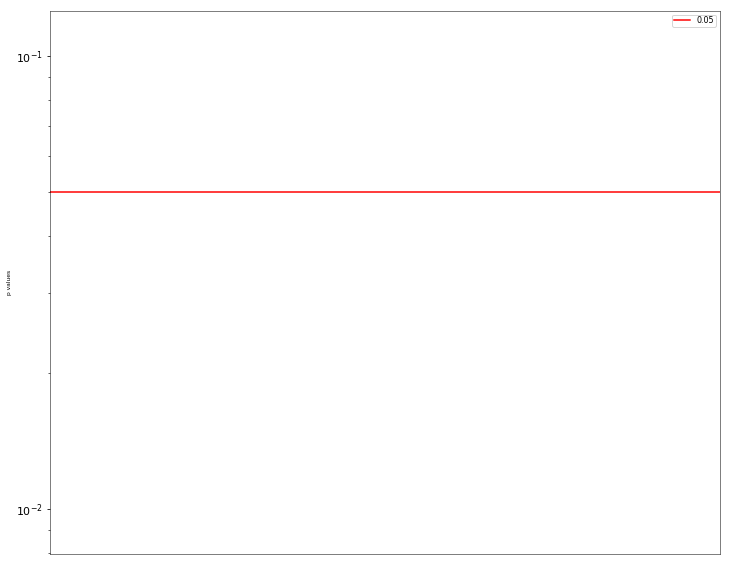

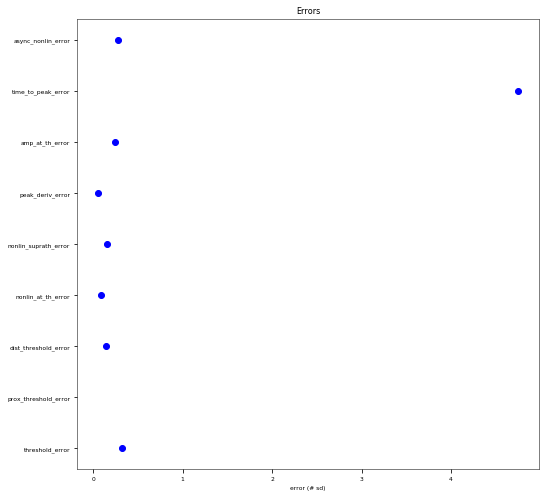

=== Model Gomez_Gonzalez_2011_n128_morph achieved score ZScore_avg = 0.75 on test 'Oblique integration test'. ===


In [14]:
#setting synapse parameters
model.NMDA_name = 'NMDA'
model.AMPA_name = 'GLU'
model.AMPA_NMDA_ratio = 1/0.396

# Instantiate the test class
test = tests.ObliqueIntegrationTest(observation = observation, save_all = True, force_run_synapse=False, force_run_bin_search=False, show_plot = True, base_directory = base_directory)

# Number of parallel processes
test.npool = 10

try: 
    # Run the test
    score = test.judge(model)
    #Summarize and print the score achieved by the model on the test using SciUnit's summarize function
    score.summarize()
except Exception as e:
    print 'Model: ' + model.name + ' could not be run'
    print e
    pass 